In [44]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Importing the Data

In [45]:
crime = pd.read_csv('NCVS_2020.csv')

In [46]:
crime.head()

,YEARQ,IDHH,ICPSR,PANEL_ROT_GROUP,URBANICITY,LIV_TYPE,UNITS,OUTSIDE,GATED,RESTRICTED,...,ACTIVE_DUTY,JOB_WEEK,JOB_6MO,JOB_2WEEK,JOB,EMP_TYPE,JOB_LOC,JOB_COLLEGE,ATT_COLLEGE,NUM_INCIDENTS
0,2020.1,1.602010e+24,9,37,2,1,6,1,2,2,...,1,1,9,9,11,3,1,2,4,1
1,2020.1,1.602070e+24,9,31,1,12,6,2,2,2,...,1,2,1,1,23,1,3,2,1,2
2,2020.1,1.602070e+24,9,31,1,12,6,2,2,2,...,1,2,1,1,23,1,3,2,1,2
3,2020.1,1.602070e+24,5,21,2,1,1,9,2,2,...,1,1,9,9,12,3,1,1,4,1
4,2020.1,1.602070e+24,5,37,2,1,1,9,2,2,...,4,1,9,9,26,1,4,2,4,1


In [47]:
#crime.info()
crime['IDHH'].nunique()

1811

There are 1811 unique households in the dataset

In [48]:
crime.columns

Index(['YEARQ', 'IDHH', 'ICPSR', 'PANEL_ROT_GROUP', 'URBANICITY', 'LIV_TYPE',
       'UNITS', 'OUTSIDE', 'GATED', 'RESTRICTED', 'INCOME', 'RACE_HOH',
       'PRINCIPAL_REL', 'PRINCIPAL_AGE', 'PRINCIPAL_MARITAL', 'PRINCIPAL_SEX',
       'PRINCIPAL_ARMFOR', 'PRINCIPAL_ED', 'PRINCIPAL_RACE', 'PRINCIPAL_HISP',
       'REF_AGE', 'REF_MARITAL', 'REF_SEX', 'REF_ARMFOR', 'REF_ED', 'REF_RACE',
       'REF_HISP', 'NUM_OVER12', 'NUM_UNDER12', 'NUM_REPORT', 'BUSINESS',
       'BUSINESS_SIGN', 'BROKEN_IN', 'NUM_BROKEN_IN', 'NUM_VEHICLE',
       'VEHICLE_THEFT', 'NUM_VEHICLE_THEFT', 'COLLEGE', 'PUBLIC', 'INDIAN_RES',
       'FAMILY_STRUCTURE', 'REGION', 'PRINCIPAL_SCHOOL', 'REF_SCHOOL',
       'REF_REL', 'AGE', 'MARITAL', 'SEX', 'ARMFOR', 'ED', 'RACE', 'HISP',
       'STOLEN', 'NUM_STOLEN', 'ATTACK_LOC', 'WEAPON', 'NUM_WEAPON',
       'OFFENDER_KNOWN', 'NUM_OFFENDER_KNOWN', 'FORCED_SEX', 'NUM_FORCED_SEX',
       'POLICE', 'NO_POLICE', 'DIS_HEAR', 'DIS_VIS', 'DIS_LEARN', 'DIS_PHYS',
       'DIS_DRESS

## General Characteristics of Sample

### 1. Distribution of Race

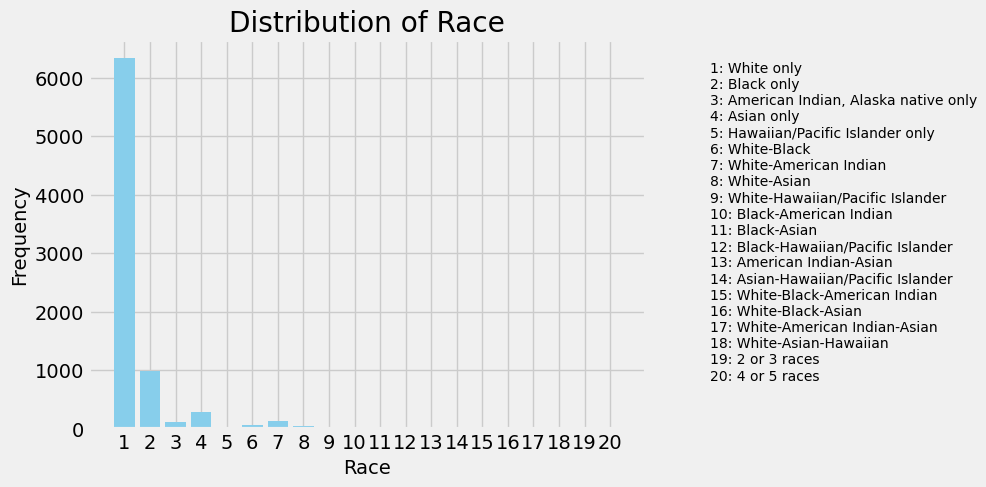

In [49]:
race = crime.groupby(by='RACE').count().reset_index() 
race_type = race['RACE']
race_count = race['IDHH']

race_labels = [
    "White only",
    "Black only",
    "American Indian, Alaska native only",
    "Asian only",
    "Hawaiian/Pacific Islander only",
    "White-Black",
    "White-American Indian",
    "White-Asian",
    "White-Hawaiian/Pacific Islander",
    "Black-American Indian",
    "Black-Asian",
    "Black-Hawaiian/Pacific Islander",
    "American Indian-Asian",
    "Asian-Hawaiian/Pacific Islander",
    "White-Black-American Indian",
    "White-Black-Asian",
    "White-American Indian-Asian",
    "White-Asian-Hawaiian",
    "2 or 3 races",
    "4 or 5 races",
]


plt.bar(race_type, race_count, color='skyblue')
plt.ylabel('Frequency')
plt.xlabel('Race')
plt.xticks(range(1, 21))
plt.title('Distribution of Race')

legend_text = "\n".join([f"{i}: {label}" for i, label in zip(range(1, 21), race_labels)])
plt.figtext(1.05, 0.5, legend_text, va="center", fontsize=10)
plt.savefig('race_distribution.png', bbox_inches='tight')

### 2. Distribution Table of Marital Status

In [50]:
marital = crime.groupby(by='MARITAL').count().reset_index()
mar_type = marital['MARITAL']
mar_count = marital['IDHH']

marital_labels = ['Married', 'Widowed', 'Divorced', 'Separated', 'Never married', 'Residue']
marital_df = pd.DataFrame({'Marital Status': marital_labels, 'Count': mar_count})
marital_df.sort_values('Count',ascending=False).reset_index(drop=True)

,Marital Status,Count
0,Married,3131
1,Never married,2760
2,Divorced,1333
3,Widowed,475
4,Separated,301
5,Residue,43


### 3. Distribution of Age

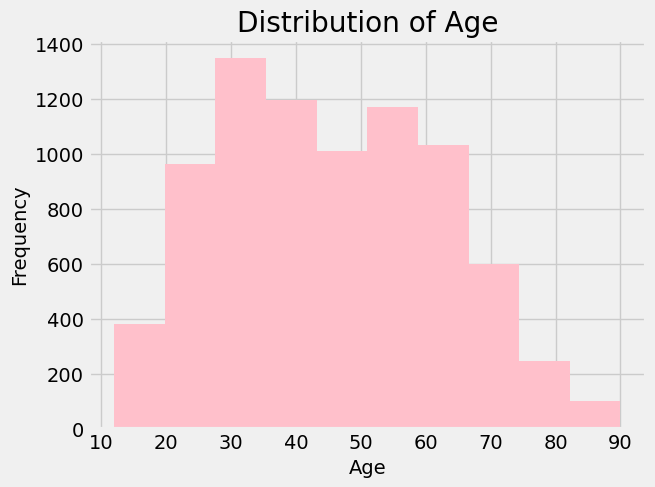

In [51]:
crime['AGE'].hist(color='pink')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.savefig('age_distribution.png',bbox_inches='tight')

In [52]:
mean = crime['AGE'].mean()
median = crime['AGE'].median()
std = crime['AGE'].std()

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std)

Mean: 45.24841477060798
Median: 44.0
Standard Deviation: 16.95228490800369


### 4. Distribution Table of Income

In [53]:
income = crime.groupby(by='INCOME').count().reset_index()
income_type = ['Less than 5,000','5,000 to 7,499','7,500 to 9,999','10,000 to 12,499','12,500 to 14,999',
               '15,000 to 17,499','17,500 to 19,999','20,000 to 24,999','25,000 to 29,999','30,000 to 34,999',
               '35,000 to 39,999','40,000 to 49,999','50,000 to 74,999','75,000 to 99,999','100,000-149,999',
               '150,000-199,999','200,000 or more']

income_count = income['IDHH']
income_df = pd.DataFrame({'Income in $': income_type, 'Count': income_count})

income_df

,Income in $,Count
0,"Less than 5,000",228
1,"5,000 to 7,499",109
2,"7,500 to 9,999",170
3,"10,000 to 12,499",270
4,"12,500 to 14,999",192
5,"15,000 to 17,499",181
6,"17,500 to 19,999",182
7,"20,000 to 24,999",470
8,"25,000 to 29,999",358
9,"30,000 to 34,999",443


## College Related Variables

### 1. Living in College Table

In [54]:
college = crime.groupby(by='COLLEGE').count().reset_index()
college_type = ['Yes','No']

college_count = college['IDHH']
college_df = pd.DataFrame({'Living in College': college_type, 'Count': college_count})

college_df

,Living in College,Count
0,Yes,77
1,No,7966


### 2. Attending Higher Education

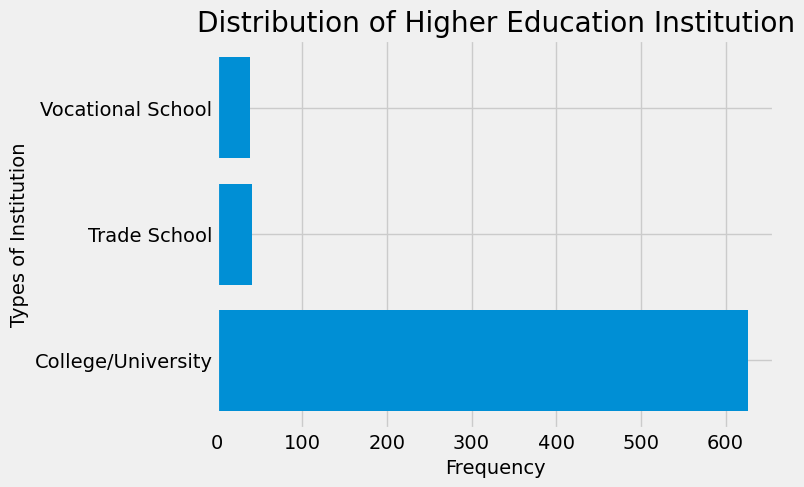

In [55]:
att_college = crime[crime['ATT_COLLEGE'].isin(np.arange(1,4))]  # attending higher education (only taking ones going to any of the four types of college that is why we exclude 4,8,9)
att_college_type = att_college.groupby(by='ATT_COLLEGE').count().reset_index()
types = att_college_type['ATT_COLLEGE']
count = att_college_type['IDHH']
college_desc = ['College/University', 'Trade School', 'Vocational School']

plt.barh(college_desc, count)
plt.xlabel('Frequency')
plt.ylabel('Types of Institution')
plt.title('Distribution of Higher Education Institution')
plt.savefig('attending_college_distribution.png',bbox_inches='tight')

In [56]:
percent_student_living_on_campus = (len(att_college[att_college['COLLEGE']==1])/len(att_college))*100
percent_student_living_on_campus

6.090651558073654

Finding: there are only 6.09% of college students that live on campus

## Relationship Between Variables

In [57]:
def replace_999_with_0_and_copy(dataframe):
    '''creating a copy of a dataframe that also replaces 999 values to 0'''
    new_df = dataframe.copy()
    new_df.replace(999, 0, inplace=True)
    return new_df

def add_incidents(param1, param2, param3, param4, param5):
    '''adding all the number of 5 specific incidents'''
    result = param1 + param2 + param3 + param4 + param5
    return result

#the new data frame:
new_crime_df = replace_999_with_0_and_copy(crime)

# creating a new column from applying add_incidents function to the new data frame
new_crime_df['NUM_5_SPECIFIC_INCIDENTS'] = new_crime_df.apply(lambda x: add_incidents(x['NUM_STOLEN'], x['NUM_VEHICLE_THEFT'], x['NUM_BROKEN_IN'], x['NUM_WEAPON'], x['NUM_FORCED_SEX']), axis=1)

The reason for my interest in determining the count of these five particular incidents, rather than relying on either NUM_REPORT or NUM_INCIDENTS, lies in the variation between the values in NUM_REPORT and NUM_INCIDENTS. As it remains unclear which one accurately represents the total number of incidents, we opt to create a new variable encompassing the counts of all specific incidents, irrespective of whether they were reported or not. These specific incidents include NUM_STOLEN, NUM_VEHICLE_THEFT, NUM_BROKEN_IN, NUM_WEAPON, and NUM_FORCED_SEX.

In [58]:
new_crime_df.head()

,YEARQ,IDHH,ICPSR,PANEL_ROT_GROUP,URBANICITY,LIV_TYPE,UNITS,OUTSIDE,GATED,RESTRICTED,...,JOB_WEEK,JOB_6MO,JOB_2WEEK,JOB,EMP_TYPE,JOB_LOC,JOB_COLLEGE,ATT_COLLEGE,NUM_INCIDENTS,NUM_5_SPECIFIC_INCIDENTS
0,2020.1,1.602010e+24,9,37,2,1,6,1,2,2,...,1,9,9,11,3,1,2,4,1,1.0
1,2020.1,1.602070e+24,9,31,1,12,6,2,2,2,...,2,1,1,23,1,3,2,1,2,2.0
2,2020.1,1.602070e+24,9,31,1,12,6,2,2,2,...,2,1,1,23,1,3,2,1,2,2.0
3,2020.1,1.602070e+24,5,21,2,1,1,9,2,2,...,1,9,9,12,3,1,1,4,1,0.0
4,2020.1,1.602070e+24,5,37,2,1,1,9,2,2,...,1,9,9,26,1,4,2,4,1,1.0


In [59]:
att_college = new_crime_df[new_crime_df['ATT_COLLEGE'].isin(np.arange(1,4))] #data frame from students in higher education institution (above highschool)

offcampus_students = att_college[att_college['COLLEGE']==2] #students in att_college that live ON-CAMPUS
oncampus_students = att_college[att_college['COLLEGE']==1] #students in att_college that live OFF-CAMPUS

n_offcampus_students = offcampus_students.shape[0] #the number of students living off campus
n_oncampus_students = oncampus_students.shape[0] #the number of students living on campus
n_offcampus_incidents = att_college[att_college['COLLEGE']==2]['NUM_5_SPECIFIC_INCIDENTS'].sum()
n_oncampus_incidents = att_college[att_college['COLLEGE']==1]['NUM_5_SPECIFIC_INCIDENTS'].sum()

mean_incidents_offcampus = n_offcampus_incidents/n_offcampus_students
mean_incidents_oncampus = n_oncampus_incidents/n_oncampus_students

In [60]:
data = {
    'where students live': ['off-campus', 'on-campus'],
    'number of students':[n_offcampus_students,n_oncampus_students],
    'total_number_incidents': [n_offcampus_incidents,n_oncampus_incidents],
    'mean': [mean_incidents_offcampus,mean_incidents_oncampus]
}
college_incidents_df = pd.DataFrame(data)

# Display the resulting DataFrame
college_incidents_df

,where students live,number of students,total_number_incidents,mean
0,off-campus,663,958.0,1.444947
1,on-campus,43,38.0,0.883721


This table offers intriguing insights by revealing that, on average, on-campus students experience fewer incidents per student compared to their off-campus counterparts. This difference in incident rates prompts a closer examination of the specific categories to ascertain whether they follow the same trend for both on-campus and off-campus students.

In [61]:
n_broke_in_oncampus = att_college[att_college['COLLEGE']==1]['NUM_BROKEN_IN'].sum()
n_broke_in_offcampus = att_college[att_college['COLLEGE']==2]['NUM_BROKEN_IN'].sum()

n_stolen_oncampus = att_college[att_college['COLLEGE']==1]['NUM_STOLEN'].sum()
n_stolen_offcampus = att_college[att_college['COLLEGE']==2]['NUM_STOLEN'].sum()

n_vehichle_theft_oncampus = att_college[att_college['COLLEGE']==1]['NUM_VEHICLE_THEFT'].sum()
n_vehichle_theft_offcampus = att_college[att_college['COLLEGE']==2]['NUM_VEHICLE_THEFT'].sum()

n_weapon_oncampus = att_college[att_college['COLLEGE']==1]['NUM_WEAPON'].sum()
n_weapon_offcampus = att_college[att_college['COLLEGE']==2]['NUM_WEAPON'].sum()

n_forced_sex_oncampus = att_college[att_college['COLLEGE']==1]['NUM_FORCED_SEX'].sum()
n_forced_sex_offcampus = att_college[att_college['COLLEGE']==2]['NUM_FORCED_SEX'].sum()

#FINDING THE MEAN
mean_broke_in_oncampus = n_broke_in_oncampus/n_oncampus_students
mean_broke_in_offcampus = n_broke_in_offcampus/n_offcampus_students

mean_stolen_oncampus = n_stolen_oncampus/n_oncampus_students
mean_stolen_offcampus = n_stolen_offcampus/n_offcampus_students

mean_vehichle_theft_oncampus = n_vehichle_theft_oncampus/n_oncampus_students
mean_vehichle_theft_offcampus = n_vehichle_theft_offcampus/n_offcampus_students

mean_weapon_oncampus = n_weapon_oncampus/n_oncampus_students
mean_weapon_offcampus = n_weapon_offcampus/n_offcampus_students

mean_forced_sex_oncampus = n_forced_sex_oncampus/n_oncampus_students
mean_forced_sex_offcampus = n_forced_sex_offcampus/n_offcampus_students

data = {
    'Student Type': ['On Campus', 'Off Campus'],
    'Mean Break-ins': [mean_broke_in_oncampus, mean_broke_in_offcampus],
    'Mean Stolen': [mean_stolen_oncampus, mean_stolen_offcampus],
    'Mean Vehicle Thefts': [mean_vehichle_theft_oncampus, mean_vehichle_theft_offcampus],
    'Mean Crimes with Weapon': [mean_weapon_oncampus, mean_weapon_offcampus],
    'Mean Forced Sex': [mean_forced_sex_oncampus, mean_forced_sex_offcampus]
}

df = pd.DataFrame(data)
df

,Student Type,Mean Break-ins,Mean Stolen,Mean Vehicle Thefts,Mean Crimes with Weapon,Mean Forced Sex
0,On Campus,0.023256,0.697674,0.000000,0.093023,0.069767
1,Off Campus,0.119155,0.917044,0.146305,0.217195,0.045249


In addition, the data reveals a notable contrast between on-campus and off-campus students in terms of the mean number of break-ins per student, with off-campus students experiencing a significantly higher rate, nearly four and a half times greater than that of their on-campus counterparts.

Now, let's delve into an exploration of the relationship between reporting incidents to the police and not reporting them, with a focus on how this might be influenced by the students' residential status (on-campus or off-campus). This analysis will shed light on whether the living environment plays a role in students' decisions to report incidents to the police.

In [62]:
police_oncampus = oncampus_students[oncampus_students['POLICE']==1].count()['IDHH']
no_police_oncampus = oncampus_students[oncampus_students['NO_POLICE']==1].count()['IDHH']
police_offcampus = offcampus_students[offcampus_students['POLICE']==1].count()['IDHH']
no_police_offcampus = offcampus_students[offcampus_students['NO_POLICE']==1].count()['IDHH']

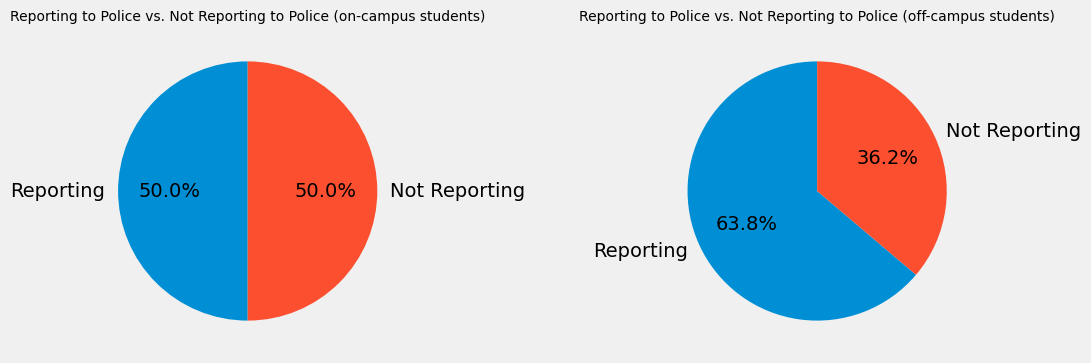

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

#for on campus
labels = ['Reporting', 'Not Reporting']
values = [police_oncampus, no_police_oncampus]
axes[0].pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Reporting to Police vs. Not Reporting to Police (on-campus students)',fontsize=10)

#for off campus
labels = ['Reporting', 'Not Reporting']
values = [police_offcampus, no_police_offcampus]
axes[1].pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Reporting to Police vs. Not Reporting to Police (off-campus students)',fontsize=10)

plt.savefig('police_reporting_piechart.png')
plt.show()

In these findings, it becomes evident that there is a substantial difference in reporting behaviors between on-campus and off-campus students. Specifically, there is a 50% likelihood that an on-campus student will contact the police when they believe they've experienced a crime. In contrast, students living off-campus exhibit a greater inclination (62.9%) to report incidents they consider crimes to the police.

Now, let's shift our focus to examine the proportions of students, both on-campus and off-campus, residing in various types of housing, including gated, restricted, and those with direct outside access.

In [64]:
percent_gated_oncampus = oncampus_students[oncampus_students['GATED']==1].shape[0]/len(oncampus_students)*100
percent_gated_offcampus = offcampus_students[offcampus_students['GATED']==1].shape[0]/len(offcampus_students)*100

percent_restricted_oncampus = oncampus_students[oncampus_students['RESTRICTED']==1].shape[0]/len(oncampus_students)*100
percent_restricted_offcampus = offcampus_students[offcampus_students['RESTRICTED']==1].shape[0]/len(offcampus_students)*100

percent_outside_oncampus = oncampus_students[oncampus_students['OUTSIDE']==1].shape[0]/len(oncampus_students)*100
percent_outside_offcampus = offcampus_students[offcampus_students['OUTSIDE']==1].shape[0]/len(offcampus_students)*100

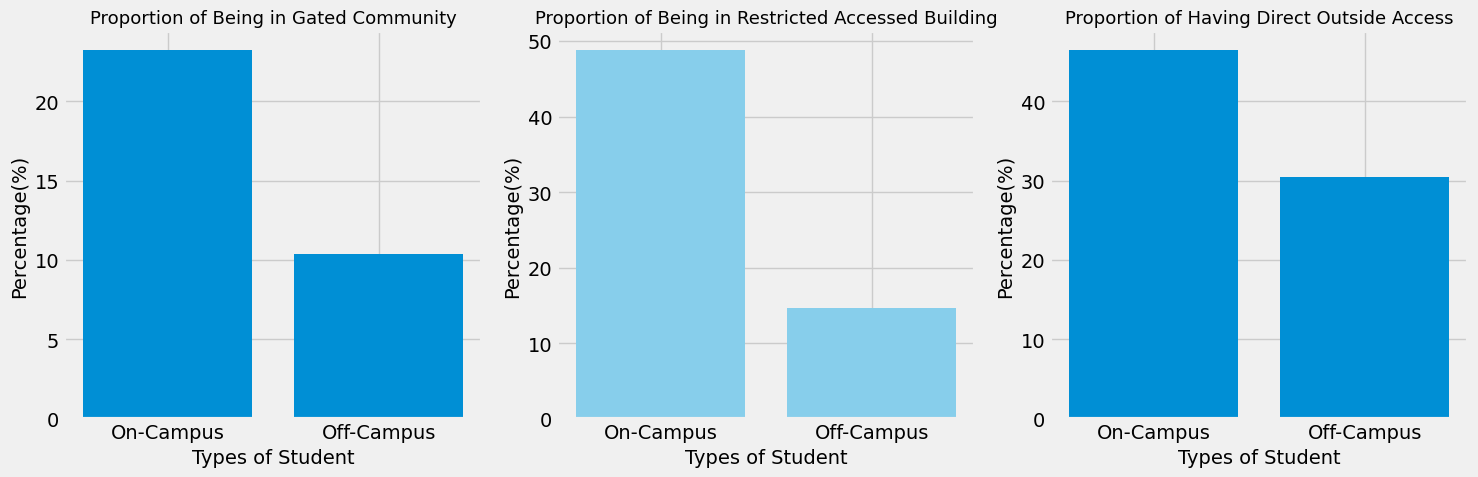

In [65]:
fig,axes = plt.subplots(1,3,figsize=(15,5))

axes[0].bar(['On-Campus', 'Off-Campus'],[percent_gated_oncampus, percent_gated_offcampus])
axes[0].set_title('Proportion of Being in Gated Community',fontsize=13)
axes[0].set_ylabel('Percentage(%)')
axes[0].set_xlabel('Types of Student')

axes[1].bar(['On-Campus', 'Off-Campus'], [percent_restricted_oncampus, percent_restricted_offcampus],color='skyblue')
axes[1].set_title('Proportion of Being in Restricted Accessed Building',fontsize=13)
axes[1].set_ylabel('Percentage(%)')
axes[1].set_xlabel('Types of Student')

axes[2].bar(['On-Campus', 'Off-Campus'], [percent_outside_oncampus, percent_outside_offcampus])
axes[2].set_title('Proportion of Having Direct Outside Access',fontsize=13)
axes[2].set_ylabel('Percentage(%)')
axes[2].set_xlabel('Types of Student')

plt.tight_layout()
plt.savefig('students_living_arrangement_barcharts.png',bbox_inches='tight')

The statistics reveal interesting differences between on-campus and off-campus student living arrangements. Approximately 23% of on-campus students reside in gated communities, whereas only 10% of off-campus students do the same. Furthermore, a significant 45% of on-campus students live in areas with direct outside access, while only 27% of off-campus students enjoy this convenience.

It's worth noting that on-campus students are more likely to live in gated communities and restricted access buildings, which may contribute to the lower mean crime rate per student in on-campus housing. However, the higher percentage of on-campus students with direct outside access seems to contradict our initial findings.

In [66]:
def offender_known_proportion(num_known, num_crimes):
    '''takes in the number of offender known and the number of 5 specific crimes then return the proportion of times that the offender is known'''
    if pd.notna(num_known) and pd.notna(num_crimes) and num_crimes != 0:
        return (num_known / num_crimes)*100
    return 0

college_df = att_college.groupby('COLLEGE').sum().reset_index()
college_df['Proportion Offender Known (%)']=college_df.apply(lambda x: offender_known_proportion(x['NUM_OFFENDER_KNOWN'],x['NUM_5_SPECIFIC_INCIDENTS']), axis=1)
college_df[['COLLEGE','Proportion Offender Known (%)']]

college_df['COLLEGE'] = college_df['COLLEGE'].replace({1: 'On Campus', 2: 'Off Campus'})
college_df = college_df.rename(columns={'COLLEGE': 'Student'})

college_df[['Student','Proportion Offender Known (%)']]

,Student,Proportion Offender Known (%)
0,On Campus,73.684211
1,Off Campus,8.037578


The table above shows that on-campus students have a significantly higher proportion of knowing the offender. In other words, it is more likely that the offender is someone they know than for off-campus students. This correlates with the living arrangements bar charts above, where the reason for the offender being more likely someone they know is because many on-campus students reside in a restricted and gated community. While the environment does reduce the overall probability of falling victim to crime, it simultaneously increases the likelihood of being victimized by someone in the same area/building.